In [1]:
# add path to sispeuede to sys.path in python and turn off warnings
import os, os.path
import pathlib
import sys
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

##  I'M LAZY, SO I HAVEN'T INSTALLED 

path_git = pathlib.Path("/Users/fabianfuentes/git")
for subdir in [
    "sisepuede", 
    "sisepuede_data_pipeline",
    #"sisepuede_juypyter"
]:
    path_cur = path_git.joinpath(subdir)
    if str(path_cur) not in sys.path:
        sys.path.append(str(path_cur))
        

path_sisepuede_inputs_database = pathlib.Path("/Users/fabianfuentes/git/sisepuede_inputs.sqlite")              # e.g., "/Users/usuario/git/sisepuede_data_pipeline/sisepuede_inputs.sqlite"

import lib.sisepuede_data_constructs as dc             # from sisepuede_data_pipeline

construct = dc.SISEPUEDEDataConstructs(path_output_database = path_sisepuede_inputs_database, )


In [2]:
dir_cur = pathlib.Path(os.getcwd())
input_data = dir_cur.joinpath("input_data")
output_data = dir_cur.joinpath("output_data")

In [3]:
gdp = construct.read_from_output_database(
    "GDP",
    table_type = "historical"
)

gdp.head()

,iso_alpha_3,year,gdp_mmm_usd
0,ABW,1986,1.320771
1,ABW,1987,1.533138
2,ABW,1988,1.818915
3,ABW,1989,2.038912
4,ABW,1990,2.120000


In [4]:
#filter data for Uganda
gdp = gdp[gdp['iso_alpha_3'] == 'UGA']
gdp.describe()


,year,gdp_mmm_usd
count,44.000000,44.000000
mean,2000.500000,42.300549
std,12.845233,30.475254
min,1979.000000,11.098871
25%,1989.750000,15.618110
50%,2000.500000,30.595000
75%,2011.250000,67.097500
max,2022.000000,107.730000


In [5]:
gdp = gdp[gdp['year'] <= 2023].copy() # Filter out future years
gdp.tail()

,iso_alpha_3,year,gdp_mmm_usd
7392,UGA,2018,90.79
7393,UGA,2019,96.64
7394,UGA,2020,99.49
7395,UGA,2021,103.01
7396,UGA,2022,107.73


In [6]:
# Define the growth rates for each period
growth_rates = [
    (2024, 2025, 8.35),   # 2021-2025 
    (2026, 2030, 8.22),   # 2026-2030
    (2031, 2035, 8.07),   # 2031-2035
    (2036, 2040, 7.83),   # 2036-2040
    (2041, 2050, 7.83)    # 2041-2050
]

In [7]:
last_gdp = gdp.iloc[-1]['gdp_mmm_usd']
projection = []

In [8]:
# Generate projections based on the defined growth rates
for start, end, rate in growth_rates:
    for year in range(start, end+1):
        last_gdp *= (1 + rate/100)
        projection.append({'year': year, 'gdp_mmm_usd': last_gdp})

# Combine the original GDP data with the projections        
gdp_extended = pd.concat([gdp, pd.DataFrame(projection)], ignore_index=True)        

<Axes: xlabel='year'>

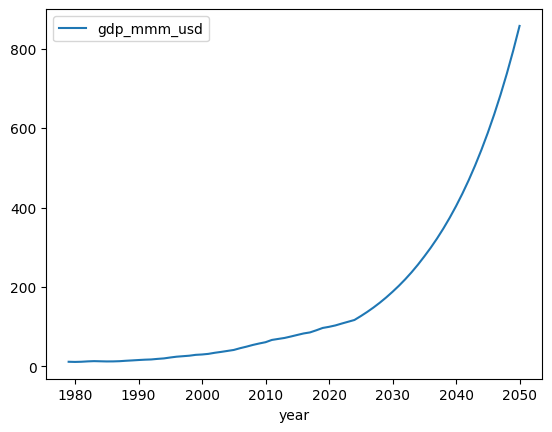

In [9]:
gdp_extended.plot(x = 'year', y='gdp_mmm_usd')

In [10]:
# Prepare the final DataFrame with the required columns
gdp_extended = gdp_extended.drop(columns=['iso_alpha_3'])
gdp_extended.head()

,year,gdp_mmm_usd
0,1979,11.488563
1,1980,11.098871
2,1981,11.527176
3,1982,12.472981
4,1983,13.084033


In [11]:
gdp_extended.to_csv(output_data.joinpath("gdp_mmm_usd.csv"), index=False)